# Import the libraries that will be used throughout the examination of the data

In [25]:
# Importing important Libraries used by all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import library for split and train
from sklearn.model_selection import train_test_split

# Import for linear Regression
from sklearn.linear_model import LinearRegression

# Import for PCA
from sklearn.decomposition import PCA

# Import for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import for Decision Tree Reg
from sklearn.tree import DecisionTreeRegressor

# Import for K-Fold
from sklearn.svm import SVC

# K-Fold cross validation
from sklearn.model_selection import cross_val_score

# Import for normalizing
from sklearn.preprocessing import StandardScaler

# Import for finding the error of the model
from sklearn import metrics

# Import for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Backward Elimination
import statsmodels.api as sm

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Applying PCA
from sklearn.decomposition import PCA

# Load in the premier league data set and clean it up so it can be examined

In [18]:
# Loading in the data set being used
dataset = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")
dataset_test = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")

# Clean up the data
# DROP VALUES:
dataset.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

dataset_test.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

#dataset_all.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

#dataset_test_all.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

# Remove bad instances located near bottom of set
dataset=dataset.iloc[:67936,:]

# Remove all players with minutes = 0
dataset = dataset[dataset.minutes!=0]

# Set the target y as total_points and x as remaining columns
dataset_test.drop(["goals_scored"], axis=1, inplace=True)
X = dataset.iloc[:,dataset.columns != "total_points"].values
y = dataset.iloc[:,dataset.columns == "total_points"].values

/Users/suyash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12,30,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Split for train(.70) and test(.30) data

In [19]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print(np.unique(y_test), len(X_train), len(y_train))

[-4. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.
 15. 16. 17. 18. 19. 20. 21. 23. 24.] 21981 21981


# Lets examine the data before setting it to the different models selected

[  14   44  156 1043 7134 6291 1715  382  828 1703  718  607  405  229
  195  148  130   64   90   37   17   10    6    4    9    1    1]


<BarContainer object of 27 artists>

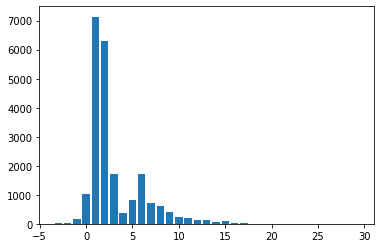

In [20]:
total_goals = np.unique(y_train, return_counts=True)

print(total_goals[1])
plt.bar(total_goals[0],total_goals[1])

# Normalizing the data to make sure no one variable pulls to much on the prediction. (Do We Need to Normalize)

In [21]:
# Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting the data to a Multiple Linear Regression Model

480471 9421


ValueError: x and y must be the same size

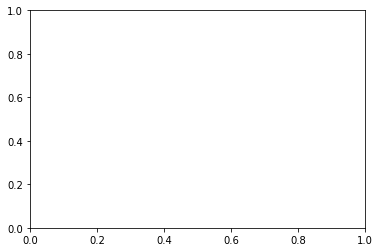

In [30]:
# Fitting the multiple linear regresion to the training set
mlr_obj = LinearRegression()
mlr_obj.fit(X_train, y_train)


num_culmn_raw  = X_train[0,:]

# print("The weight parameters are:")

# for idx, col_name in enumerate(dataset_test.columns[:len(num_culmn_raw)]):
#     print("({}) {}: {}".format(idx, col_name, mlr_obj.coef_[0][idx]))

# Predicting on the test set
mlr_y_pred = mlr_obj.predict(X_test)
print(X_test.size,y_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X)
prObj = LinearRegression()
print(X_poly, y)
prObj.fit(X_poly, y)
# y_pred_pol = prObj.predict(X_test)
# print("Mean Square Error:",metrics.mean_squared_error(y_test, y_pred))

[[ 1.  0.  3. ...  0.  0.  0.]
 [ 1.  0. 26. ...  0.  0.  0.]
 [ 1.  1. 15. ...  0.  0.  0.]
 ...
 [ 1.  0. 11. ...  0.  0.  0.]
 [ 1.  0.  6. ...  0.  0.  0.]
 [ 1.  0. 31. ...  0.  0.  0.]] [[1.]
 [2.]
 [5.]
 ...
 [2.]
 [1.]
 [2.]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Calculate the Mean Squared Error for the model

In [7]:
print("Mean Squared Error for MLR:", metrics.mean_squared_error(y_test, mlr_y_pred))

Mean Squared Error for MLR: 0.47544522474519063


# Using backwards elimination to trim the data

In [8]:
def backwardElimination(x, sl):
    
    numVars = len(x[0])
    for i in range(0, numVars):
        
        #print("check:", i)

        obj_OLS = sm.OLS(endog = y, exog = x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        #print(maxVar)

        if maxVar > sl:
            
            for j in range(0, numVars - i):
                
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    dataset_test.drop([dataset_test.columns[j]], axis=1, inplace=True)
                    
                    
    obj_OLS.summary()
    return x


X = X.astype(float)
SL = 0.05
X_sig = X[:,:]
X_Modeled = backwardElimination(X_sig, SL)

# Now run the trimed data with a linear regression model

In [9]:
# Split the data
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(
    X_Modeled, y, test_size = 0.3)

mlr_bw_obj = LinearRegression()
mlr_bw_obj.fit(X_sig_train, y_sig_train)

y_sig_pred = mlr_bw_obj.predict(X_sig_test)

num_culmn_sig  = X_Modeled[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset_test.columns[:len(num_culmn_sig)]):
    print("({}) {}: {}".format(idx, col_name, mlr_bw_obj.coef_[0][idx]))

#print("Mean Squared Error for MLR and Backward Elimination:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

The weight parameters are:
(0) assists: 1.5011462932732282
(1) attempted_passes: 0.016844924293924264
(2) big_chances_created: -0.5000895114112597
(3) big_chances_missed: 0.4741551225398429
(4) bonus: 1.1180876821039687
(5) bps: 0.16505482991861542
(6) clean_sheets: 1.1541801025906255
(7) clearances_blocks_interceptions: -0.0687909677887996
(8) completed_passes: -0.02693289825104716
(9) creativity: 0.03893216867094057
(10) dribbles: -0.1392527647977627
(11) element: -1.0179219929851158e-05
(12) errors_leading_to_goal: 0.19235109448776838
(13) errors_leading_to_goal_attempt: 0.13759482435087073
(14) fixture: -0.0009037308044712519
(15) fouls: 0.14784132583740242
(16) goals_conceded: -0.25987357203521944
(17) ict_index: 1.538518902372128
(18) id: -0.3469950745773519
(19) influence: -1.374689186750544e-05
(20) key_passes: 0.030856728364621
(21) loaned_in: -0.20661378814759723
(22) loaned_out: 2.79033046668431e-12
(23) minutes: -2.8000241014680682e-12
(24) offside: 0.006679555170311633
(25

# MLR and Backward Elimination Mean Squared Error

In [10]:
print("Mean Squared Error for MLR and Backward Elimination:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

Mean Squared Error for MLR and Backward Elimination: 0.4670315125039519


# Examine a Decison Tree regresion

In [11]:
dtr_obj = DecisionTreeRegressor()
dtr_obj.fit(X_train, y_train)

dtr_y_pred = dtr_obj.predict(X_test)

print("Mean Squared Error for Decision Tree:", metrics.mean_squared_error(y_test, dtr_y_pred))

Mean Squared Error for Decision Tree: 0.4605668188090436


# Examine a Random Forrest model

In [12]:
num_tree = []
msqe = []

for n in range (10, 301, 10):
    
    num_tree.append(n)
    
    randf_obj = RandomForestRegressor(n_estimators=n)
    randf_obj.fit(X_train, y_train)
    
    randf_y_pred = randf_obj.predict(X_test)
    
    mean_sqr_eror = metrics.mean_squared_error(y_test, 
                                               randf_y_pred)
    
    # print(mean_sqr_eror)
    
    msqe.append(mean_sqr_eror)
    
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

Lowest testing error = 0.21604428404627957
Associated number of trees (n_estimator) = 50


In [13]:
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

Lowest testing error = 0.21604428404627957
Associated number of trees (n_estimator) = 50


# PCA model examination

In [14]:
num_tree_pca = []
pca_error = []

for n in range(1, len(num_culmn_raw)):
    num_tree_pca.append(n)
    
    pca_obj = PCA(n_components=n)
    X_PCA_train = pca_obj.fit_transform(X_train)
    X_PCA_test = pca_obj.transform(X_test)
    components_variance = pca_obj.explained_variance_ratio_

    # Fit a linear regression to the training set
    mlr_pca_obj = LinearRegression()
    mlr_pca_obj.fit(X_PCA_train, y_train)

    y_mlr_pca_pred = mlr_pca_obj.predict(X_PCA_test)
    
    pca_error.append(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
    
    #print(n)
    #print(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
    
print('Lowest testing error =', min(pca_error))
print('Associated number of components (n_components) =', 
      num_tree_pca[pca_error.index(min(pca_error))])

Lowest testing error = 0.475418157642694
Associated number of components (n_components) = 46


# K-Fold Tests

In [15]:
# Multiple Linear Regression Raw
modelAccuracies = cross_val_score(estimator=mlr_obj, X=X_train, y=y_train, cv=10)
print("MLR Mean:", modelAccuracies.mean())
print("MLR Standard Deviation:", modelAccuracies.std())

print()

# Multilinear Regression with Backward Elimination
modelAccuracies = cross_val_score(estimator=mlr_bw_obj, X=X_train, y=y_train, cv=10)
print("MLR/Backward Elimination Mean:", modelAccuracies.mean())
print("MLR/Backward Elimination Deviation:", modelAccuracies.std())

print()

# Decision Tree Model
modelAccuracies = cross_val_score(estimator=dtr_obj, X=X_train, y=y_train, cv=10)
print("Decission Tree Mean:", modelAccuracies.mean())
print("Decission Tree Deviation:", modelAccuracies.std())

print()

# Random Forest Model
randf_obj = RandomForestRegressor(n_estimators=num_tree[msqe.index(min(msqe))])
modelAccuracies = cross_val_score(estimator=randf_obj, X=X_train, y=y_train, cv=10)
print("Random Forest Mean:", modelAccuracies.mean())
print("Random Forest Standard Deviation:", modelAccuracies.std())

print()

# PCA Model
modelAccuracies = cross_val_score(estimator=mlr_pca_obj, X=X_train, y=y_train, cv=5)
print("MLR/PCA Mean:", modelAccuracies.mean())
print("MLR/PCA Standard Deviation:", modelAccuracies.std())

MLR Mean: -3.1942301554667674e+17
MLR Standard Deviation: 9.582690466400301e+17

MLR/Backward Elimination Mean: -3.1942301554667674e+17
MLR/Backward Elimination Deviation: 9.582690466400301e+17

Decission Tree Mean: 0.9486520927859553
Decission Tree Deviation: 0.004316587537908581



/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataCon

Random Forest Mean: 0.9742435770230042
Random Forest Standard Deviation: 0.0032764066725015214

MLR/PCA Mean: 0.9475317315488306
MLR/PCA Standard Deviation: 0.0013744882569620349
